<a href="https://colab.research.google.com/github/surajvarma1/2216182_AL-ML_Bootcamp_2023/blob/main/ML_model_(3_5_23)_simple_linear_regression_case_study_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
#reading or loading data set 
import pandas as pd  # to read data set pandas module is useful
df=pd.read_csv("/content/Salary_Dataset.csv") #if u want to read CSV file use_csv if u want to read excel use _excel
df                                                  # technical term df = data frame 

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [41]:
df.head(10)


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [42]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  32 non-null     float64
 1   Salary           32 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [43]:
df.shape # we dont use bracket here () , its static methhod is pre defined in the class

(35, 2)

STEP 2 
visualize and preprocess


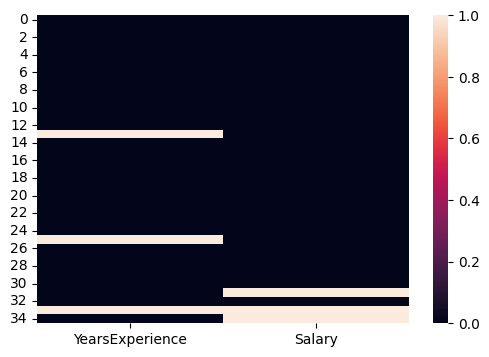

In [44]:
# VISUALIZING
# for this we use matplotlib and seaborn , seaborn is extended version of matplolib



# to see whether our dataset having any missing values

import seaborn as sns
import matplotlib.pyplot as plt

def get_heatmap(df):
  plt.figure(figsize=(6,4)) # 6 is lenth and 4 is height just like x nd y axis
  sns.heatmap(df.isnull())
  return plt.show() # its mandetory step tp show the o/p


get_heatmap(df)

   


<Axes: >

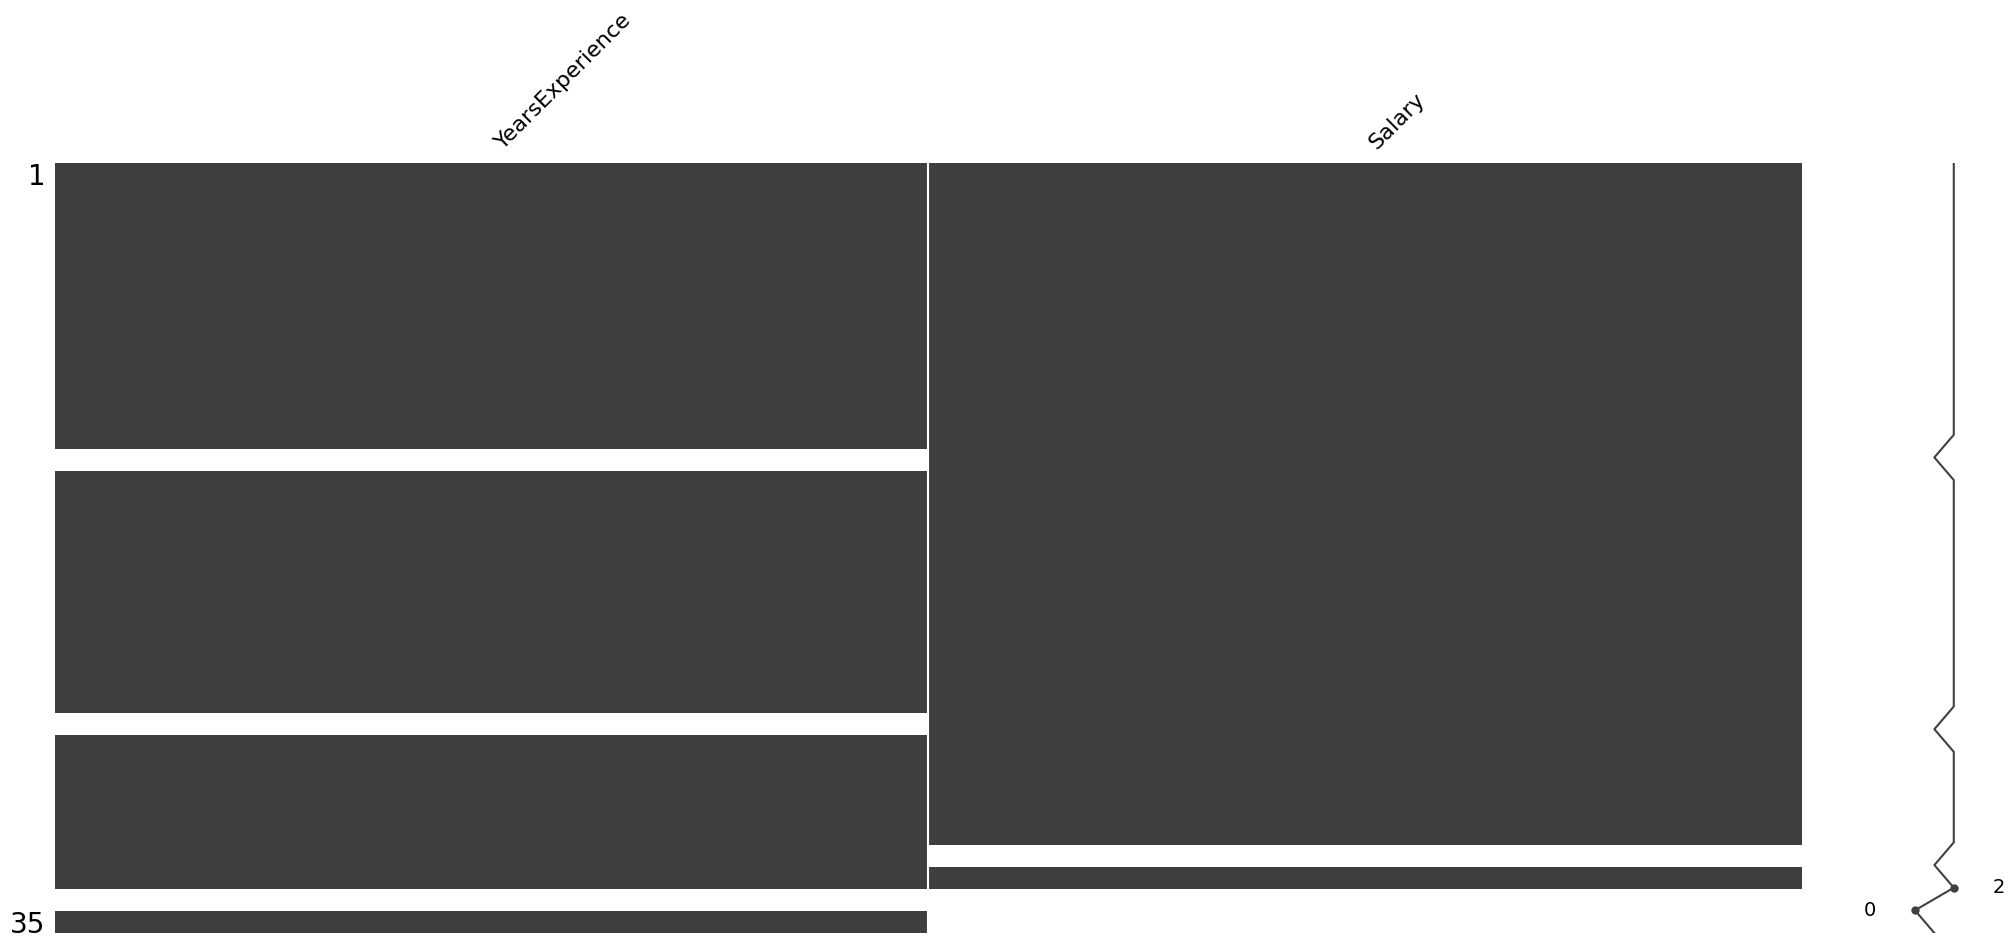

In [45]:
#other method to visualize the missing items
import missingno as msno
msno.matrix(df)

<Axes: >

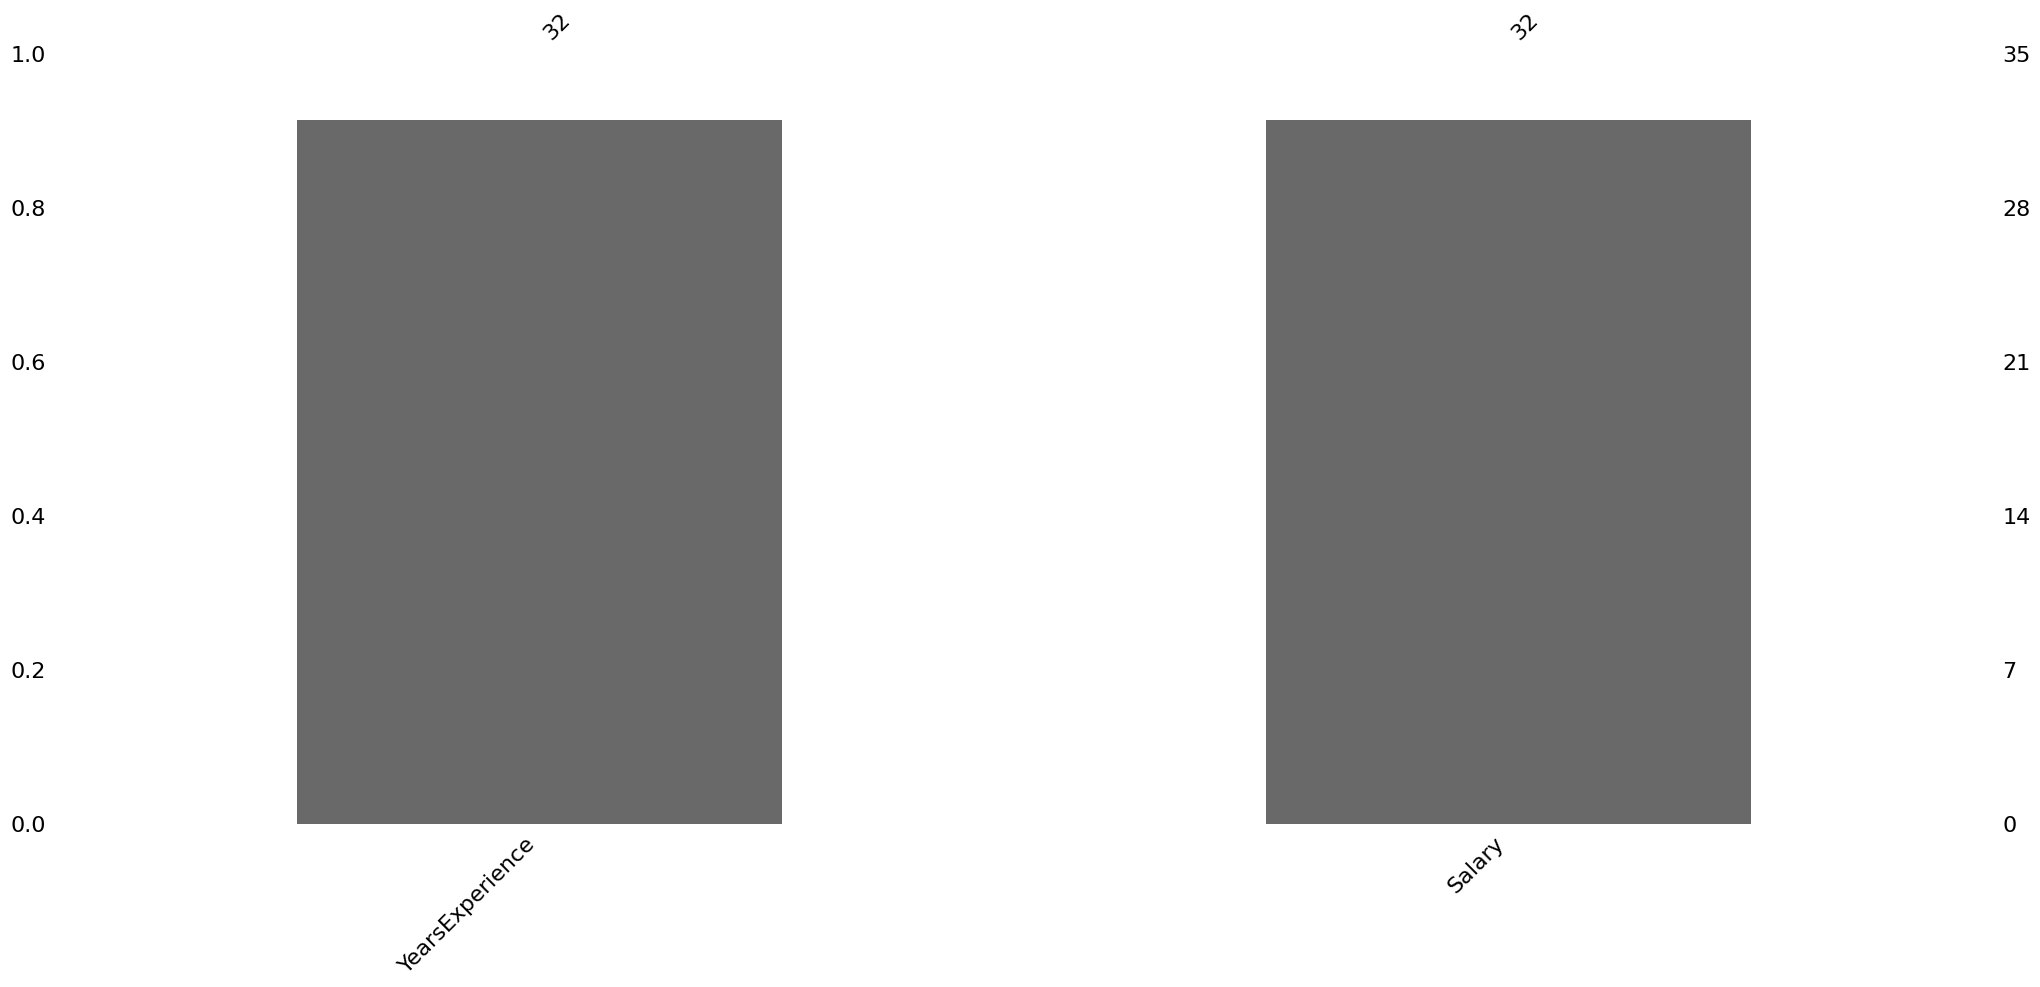

In [46]:
msno.bar(df)

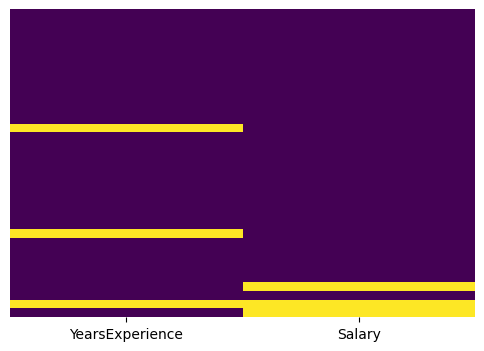

In [47]:
# to remove unneccesary things in visualizing we can remove them like , side red col bar etc
import seaborn as sns
import matplotlib.pyplot as plt

def get_heatmap(df): #heatmap is in seaborn module 
  plt.figure(figsize=(6,4)) 
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')#ytick removes numbering cbar Flse remove side red col thing, cmap add color to better visuals
  return plt.show() 


get_heatmap(df)

# o/p shows some spikes or line where there is missing value

step3 =PREPROCESS


In [48]:
# preprocess
# delete the records having NaN values --> primary way
# rplace NaN values using mean of values of that column median of values of columnns




# delete the records having NaN values
df=df.dropna()

# rplace NaN values using mean of values of that column median of values of columnns

median_year=df['YearsExperience'].median()





In [49]:
median_year

4.7

In [50]:
mean_salry=df['Salary'].mean()
print(mean_salry)

76003.0


In [51]:
import math
mean_salry=math.floor(df['Salary'].mean())
print(mean_salry)

76003


In [52]:
# rplace NaN values using mean of values of that column median of values of columnns
df['YearsExperience']=df['YearsExperience'].fillna(median_year)
df['Salary']=df['Salary'].fillna(mean_salry)
# this wil; remove all NaN values with median and mean values
# after this run heatmap code you wil not get any missing values 

<ipython-input-52-1b94636f5390>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearsExperience']=df['YearsExperience'].fillna(median_year)
<ipython-input-52-1b94636f5390>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary']=df['Salary'].fillna(mean_salry)


STEP 4 : PREPARE DATA

In [53]:
#x independent variable - yearexpeirce
# y- dependent var - salry
'''x=df['YearsExperience']
y=df['Salary']'''

#2D- data frame - for feeding ML model we need to feed 2D data only 

x=df.iloc[:,:-1].values #iloc = index location .......slicing where we want #[:,-1] staring and -1 = ending
y=df.iloc[:,1:].values  # .values convert the data into 2D 

In [54]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5],
       [ 9. ],
       [ 4.1]])

In [55]:
y

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [116969.],
       [112635.],
       [122391.],
       [121872.],
       [105582.],
       [ 57081.]])

In [56]:
#method 2 
import numpy as np # numpy function deals with 2D  data
train_x=df['YearsExperience']

In [57]:
train_x

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
26     9.5
27     9.6
28    10.3
29    10.5
30     9.0
32     4.1
Name: YearsExperience, dtype: float64

**step 5 : spliting the dataset**

In [58]:
# for spliting the ds wee need to import a module called sklearn
# spliting data is for training and testing purpose --> is set is for training and other is testing purpose
# and 80% of data set given to the traing    and 20 is for testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)



In [59]:
x_train

array([[8.2],
       [2.9],
       [5.3],
       [3.2],
       [4.9],
       [8.7],
       [7.1],
       [1.3],
       [4.1],
       [3. ],
       [2.2],
       [6. ],
       [6.8],
       [3.7],
       [3.2],
       [9.6],
       [2. ],
       [1.1],
       [7.9],
       [5.1],
       [4. ]])

In [60]:
x_test

array([[ 1.5],
       [ 9. ],
       [ 4.5],
       [ 3.9],
       [10.3],
       [ 9.5],
       [10.5],
       [ 4. ],
       [ 5.9]])

# **algorothm fitting   step 6 : training**
feeding the model

In [61]:
# to train the ds we need use from algorithms 
#data is linear regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()

fitting the algorith

In [62]:
model.fit(x_train,y_train)

LinearRegression()

step 7: testing the model

In [63]:
#for testing purpose we call a mothod called predict for testing purpose
y_pred=model.predict(x_test)

step 8 : **visualize the result (MODEL EVALUTION)**
evaluate the tesing and training data set

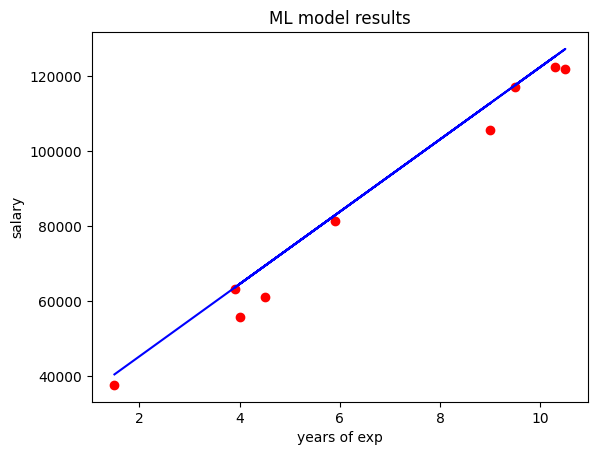

In [64]:
import matplotlib.pyplot as plt
#visualizing the test results
plt.scatter(x_test,y_test,color='red') # this are answers key all answeer 
plt.plot (x_test,y_pred,color='blue')
plt.xlabel('years of exp')
plt.ylabel("salary")
plt.title('ML model results')
plt.show()

to check the accuracy of the Ml model

In [66]:
accuracy=model.score(x_test,y_pred)
print('the accuracy is :', accuracy)



the accuracy is : 1.0
accuracy of traing is : 0.9396583123899768


visualize the traing set

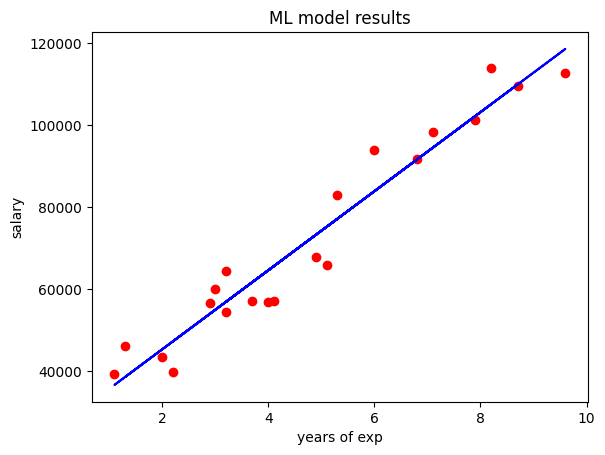

In [68]:
import matplotlib.pyplot as plt
#visualizing the test results
plt.scatter(x_train,y_train,color='red') # this are answers key all answeer 
plt.plot (x_train,model.predict(x_train),color='blue')
plt.xlabel('years of exp')
plt.ylabel("salary")
plt.title('ML model results')
plt.show()

In [72]:
#traing score
print(model.score(x_train,y_train))

0.9396583123899768


In [71]:
#overall score 
print(model.score(x,y)*100)

95.4377327827908


STEP 9 : MAKE DEPLOYMENT
making new predictions

In [74]:
# making prediction
years=float(input("enter the experience of the employee :"))
y_result=model.predict([[years]]) # two square brackets indicates 2D array [[]]
print('the predicted salary for giving age is : ', y_result)

enter the experience of the employee :1
the predicted salary for giving age is :  [[35720.37024429]]


In [75]:
# making prediction
import math
years=float(input("enter the experience of the employee :"))
y_result=model.predict([[years]]) # two square brackets indicates 2D array [[]]
print('the predicted salary for giving age is : ', math.floor(y_result))

enter the experience of the employee :6
the predicted salary for giving age is :  83887
